In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
path = 'California_Fire_Incidents.xlsx'
fire = pd.read_excel(path)
columns = ['AcresBurned', 'AirTankers', 'AdminUnit', 'Counties', 'CountyIds', 'Engines', 'Latitude', 'Longitude', 'Started']

In [3]:
fire_df = fire[columns]
print(len(fire_df))
fire_df.head()

1636


,AcresBurned,AirTankers,AdminUnit,Counties,CountyIds,Engines,Latitude,Longitude,Started
0,257314.0,NaN,Stanislaus National Forest/Yosemite National Park,Tuolumne,55,NaN,37.857000,-120.086000,2013-08-17T15:25:00Z
1,30274.0,NaN,USFS Angeles National Forest/Los Angeles Count...,Los Angeles,19,NaN,34.585595,-118.423176,2013-05-30T15:28:00Z
2,27531.0,NaN,CAL FIRE Riverside Unit / San Bernardino Natio...,Riverside,33,NaN,33.709500,-116.728850,2013-07-15T13:43:00Z
3,27440.0,NaN,Tahoe National Forest,Placer,31,NaN,39.120000,-120.650000,2013-08-10T16:30:00Z
4,24251.0,NaN,Ventura County Fire/CAL FIRE,Ventura,56,117.0,0.000000,0.000000,2013-05-02T07:01:00Z


In [4]:
fire_df.isna().sum()

AcresBurned       3
AirTankers     1608
AdminUnit         0
Counties          0
CountyIds         0
Engines        1445
Latitude          0
Longitude         0
Started           0
dtype: int64

In [5]:
fire_df = fire_df.drop(['AirTankers', 'Engines', 'AdminUnit'], axis=1)
fire_df = fire_df.dropna()
fire_df = fire_df[fire_df['Latitude'] != float(0)]
fire_df = fire_df[fire_df['Longitude'] != float(0)]
fire_df = fire_df[fire_df['Counties'] != 'State of Nevada']
fire_df = fire_df[fire_df['Counties'] != 'State of Oregon']
fire_df = fire_df[fire_df['Counties'] != 'Mexico']
len(fire_df)
#fire_df.to_csv('cleaned_fire.csv')

1475

In [6]:
fire_df.tail()


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Started
1628,10.0,Butte,4,39.423833,-121.579738,2019-07-23T14:41:00Z
1629,10.0,Siskiyou,47,41.946220,-122.401570,2019-06-16T20:33:00Z
1630,10.0,Butte,4,39.839580,-121.957000,2019-04-30T12:20:00Z
1631,9.0,Riverside,33,33.827979,-117.499619,2019-10-10T12:08:00Z
1632,2.0,Nevada,29,39.409722,-121.000556,2019-06-28T15:03:04Z


In [7]:
fire_df.dtypes

AcresBurned    float64
Counties        object
CountyIds       object
Latitude       float64
Longitude      float64
Started         object
dtype: object

In [8]:
months = []
years = []
for index, row in fire_df.iterrows():
   #print(date)
    month = row['Started'].split('-')[1]
    year = row['Started'].split('-')[0]
    months.append(np.float32(month))
    years.append(np.float32(year))

In [9]:
fire_df = fire_df.drop('Started', axis=1)
fire_df['Month'] = months
fire_df['Year'] = years
print(len(fire_df))
fire_df.head()
#fire_df.to_csv('Wildfires 2013-2019.csv')

1475


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Month,Year
0,257314.0,Tuolumne,55,37.857000,-120.086000,8.0,2013.0
1,30274.0,Los Angeles,19,34.585595,-118.423176,5.0,2013.0
2,27531.0,Riverside,33,33.709500,-116.728850,7.0,2013.0
3,27440.0,Placer,31,39.120000,-120.650000,8.0,2013.0
5,22992.0,Fresno,10,37.279000,-119.318000,7.0,2013.0


In [10]:
labels = fire_df['Counties']
features = fire_df.drop(['Counties', 'CountyIds'], axis=1)
features.head()

,AcresBurned,Latitude,Longitude,Month,Year
0,257314.0,37.857000,-120.086000,8.0,2013.0
1,30274.0,34.585595,-118.423176,5.0,2013.0
2,27531.0,33.709500,-116.728850,7.0,2013.0
3,27440.0,39.120000,-120.650000,8.0,2013.0
5,22992.0,37.279000,-119.318000,7.0,2013.0


In [11]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
#print(county_names)
one_hot_labels = dummies.to_numpy()
scaler = StandardScaler()
#acres = features['AcresBurned'].to_numpy().reshape(-1,1)
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [12]:
print(features.shape)
one_hot_labels.shape

(1475, 5)


(1475, 56)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Cleaned and Combined Dataset

In [14]:
climate = pd.read_csv('wildfire-temperature-rainfall.csv')
climate = climate.drop(['MeasurementID', 'LocationID', 'UniqueID', 'Latitude', 'Longitude'], axis=1)
climate = climate[climate['Location'] != 'Imperial']
climate = climate[climate['Location'] != 'San Francisco']
climate_labels = climate['Location']
print(climate_labels.nunique())
climate.head()


56


,AcresBurned,Month,Year,Location,Rainfall,MinTemp,MaxTemp,AvgTemp
0,38,7,2013,Alameda,5.08,48.2,70.8,59.5
1,240,6,2013,Alameda,5.08,48.2,70.8,59.5
2,50,7,2013,Alameda,5.08,48.2,70.8,59.5
3,96,6,2013,Amador,12.25,46.2,72.1,59.1
4,305,10,2013,Butte,12.19,46.8,74.1,60.4


In [15]:
features = climate.drop('Location', axis=1)
labels = climate['Location']
labels.head()

0    Alameda
1    Alameda
2    Alameda
3     Amador
4      Butte
Name: Location, dtype: object

In [23]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
one_hot_labels = dummies.to_numpy()
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
scaled

array([[-0.16515557, -0.23127052, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.15809617, -0.80103344, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.1647362 , -0.23127052, -2.08128514, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       ...,
       [-0.16403725, -0.80103344,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16515557, -0.23127052,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16368777, -0.80103344,  1.22936799, ...,  0.25889209,
         0.11528025,  0.19821298]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Model


In [26]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics

def build_dnn():

    
    normalizer = layers.BatchNormalization(momentum=0.98, epsilon=.001, trainable=True)

    model = Sequential([

        #normalizer,
        layers.Dense(24, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    model = Model([img_input, num_input], out)
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
    print("Model compiled")
    return model

In [27]:
def merged_build_dnn(fire_shape, climate_shape, numclasses):
    fire_input = Input(shape=fire_shape)
    model1 = Dense(64, activation='relu')(fire_input)
    model1 = Dense(16, activation='relu')(model1)
    #model1 = Dense(4, activation='relu')(model1)
    
    output1 = Dense(4, activation='relu')(model1)
    
    climate_input = Input(shape=climate_shape)
    model2 = Dense(16, activation='relu')(climate_input)
    #model2 = Dense(16, activation='relu')(model2)
    output2 = Dense(4, activation='relu')(model2)
    
    merged_model = concatenate([output1, output2])
    
    dp1 = Dense(4, activation='relu')(merged_model)
    output = Dense(1, activation='sigmoid')(dp1)

    model = Model(inputs=[fire_input, climate_input], outputs=output)
    print(model.summary())
    return(model)

In [28]:
def build_dnn(input_shape, numclasses):
    feature_input = Input(shape=input_shape)
    model = Dense(512, activation='relu')(feature_input)
    model = Dense(256, activation='relu')(model)
    model = Dense(128, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(16, activation='relu')(model)
    output = Dense(numclasses, activation='softmax')(model)
    model = Model(inputs=feature_input, outputs=output)
    print(model.summary())
    return(model)

In [29]:
model = build_dnn((7,), len(one_hot_labels[0]))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4096      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1040

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500)
model.evaluate(X_test, y_test, verbose=1)


Epoch 1/500
30/30 [==============================] - 0s 9ms/step - loss: 4.0156 - accuracy: 0.0097 - val_loss: 3.9997 - val_accuracy: 0.0000e+00
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 3.9802 - accuracy: 0.0462 - val_loss: 3.9530 - val_accuracy: 0.0901
Epoch 3/500
30/30 [==============================] - 0s 8ms/step - loss: 3.9234 - accuracy: 0.0838 - val_loss: 3.8769 - val_accuracy: 0.0901
Epoch 4/500
30/30 [==============================] - 0s 6ms/step - loss: 3.8365 - accuracy: 0.0827 - val_loss: 3.7743 - val_accuracy: 0.0901
Epoch 5/500
30/30 [==============================] - 0s 9ms/step - loss: 3.7413 - accuracy: 0.0827 - val_loss: 3.6827 - val_accuracy: 0.0901
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 3.6676 - accuracy: 0.0827 - val_loss: 3.6190 - val_accuracy: 0.0901
Epoch 7/500
30/30 [==============================] - 0s 4ms/step - loss: 3.6120 - accuracy: 0.0827 - val_loss: 3.5683 - val_accuracy: 0.0901
Epoch 8/5

30/30 [==============================] - 0s 4ms/step - loss: 1.5550 - accuracy: 0.5564 - val_loss: 1.6302 - val_accuracy: 0.5880
Epoch 59/500
30/30 [==============================] - 0s 9ms/step - loss: 1.5373 - accuracy: 0.5639 - val_loss: 1.6014 - val_accuracy: 0.6094
Epoch 60/500
30/30 [==============================] - 0s 10ms/step - loss: 1.5153 - accuracy: 0.5618 - val_loss: 1.6062 - val_accuracy: 0.6094
Epoch 61/500
30/30 [==============================] - 0s 6ms/step - loss: 1.4998 - accuracy: 0.5714 - val_loss: 1.5749 - val_accuracy: 0.6094
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 1.4716 - accuracy: 0.5822 - val_loss: 1.5812 - val_accuracy: 0.6009
Epoch 63/500
30/30 [==============================] - ETA: 0s - loss: 1.4410 - accuracy: 0.58 - 0s 6ms/step - loss: 1.4590 - accuracy: 0.5832 - val_loss: 1.5396 - val_accuracy: 0.6009
Epoch 64/500
30/30 [==============================] - 0s 4ms/step - loss: 1.4564 - accuracy: 0.5639 - val_loss: 1.5272

Epoch 115/500
30/30 [==============================] - 0s 6ms/step - loss: 0.8054 - accuracy: 0.7583 - val_loss: 0.9662 - val_accuracy: 0.7940
Epoch 116/500
30/30 [==============================] - 0s 3ms/step - loss: 0.8076 - accuracy: 0.7701 - val_loss: 0.9547 - val_accuracy: 0.7639
Epoch 117/500
30/30 [==============================] - 0s 6ms/step - loss: 0.7890 - accuracy: 0.7744 - val_loss: 0.9529 - val_accuracy: 0.7940
Epoch 118/500
30/30 [==============================] - 0s 9ms/step - loss: 0.7702 - accuracy: 0.7798 - val_loss: 0.9329 - val_accuracy: 0.7940
Epoch 119/500
30/30 [==============================] - 0s 6ms/step - loss: 0.7689 - accuracy: 0.7820 - val_loss: 0.9496 - val_accuracy: 0.7854
Epoch 120/500
30/30 [==============================] - 0s 7ms/step - loss: 0.7516 - accuracy: 0.7863 - val_loss: 0.9286 - val_accuracy: 0.7983
Epoch 121/500
30/30 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.7841 - val_loss: 0.9258 - val_accuracy: 0.8026

Epoch 172/500
30/30 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.8690 - val_loss: 0.7375 - val_accuracy: 0.8541
Epoch 173/500
30/30 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8861 - val_loss: 0.7180 - val_accuracy: 0.8326
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8711 - val_loss: 0.7307 - val_accuracy: 0.8541
Epoch 175/500
30/30 [==============================] - 0s 9ms/step - loss: 0.4442 - accuracy: 0.8818 - val_loss: 0.7357 - val_accuracy: 0.8283
Epoch 176/500
30/30 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8818 - val_loss: 0.7174 - val_accuracy: 0.8369
Epoch 177/500
30/30 [==============================] - 0s 10ms/step - loss: 0.4363 - accuracy: 0.8818 - val_loss: 0.7407 - val_accuracy: 0.8412
Epoch 178/500
30/30 [==============================] - 0s 6ms/step - loss: 0.4273 - accuracy: 0.8851 - val_loss: 0.7365 - val_accuracy: 0.824

Epoch 229/500
30/30 [==============================] - 0s 7ms/step - loss: 0.2865 - accuracy: 0.9173 - val_loss: 0.6709 - val_accuracy: 0.8498
Epoch 230/500
30/30 [==============================] - 0s 6ms/step - loss: 0.2860 - accuracy: 0.9162 - val_loss: 0.6722 - val_accuracy: 0.8584
Epoch 231/500
30/30 [==============================] - 0s 6ms/step - loss: 0.2821 - accuracy: 0.9270 - val_loss: 0.6644 - val_accuracy: 0.8584
Epoch 232/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.9227 - val_loss: 0.6586 - val_accuracy: 0.8627
Epoch 233/500
30/30 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.9216 - val_loss: 0.6619 - val_accuracy: 0.8712
Epoch 234/500
30/30 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.9248 - val_loss: 0.7016 - val_accuracy: 0.8541
Epoch 235/500
30/30 [==============================] - 0s 5ms/step - loss: 0.2735 - accuracy: 0.9280 - val_loss: 0.6852 - val_accuracy: 0.8412

30/30 [==============================] - 0s 7ms/step - loss: 0.2226 - accuracy: 0.9409 - val_loss: 0.6810 - val_accuracy: 0.8498
Epoch 287/500
30/30 [==============================] - 0s 7ms/step - loss: 0.1828 - accuracy: 0.9506 - val_loss: 0.6588 - val_accuracy: 0.8798
Epoch 288/500
30/30 [==============================] - 0s 7ms/step - loss: 0.1791 - accuracy: 0.9570 - val_loss: 0.6775 - val_accuracy: 0.8712
Epoch 289/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1828 - accuracy: 0.9517 - val_loss: 0.6674 - val_accuracy: 0.8798
Epoch 290/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1799 - accuracy: 0.9484 - val_loss: 0.6983 - val_accuracy: 0.8798
Epoch 291/500
30/30 [==============================] - 0s 11ms/step - loss: 0.1835 - accuracy: 0.9506 - val_loss: 0.6731 - val_accuracy: 0.8841
Epoch 292/500
30/30 [==============================] - 0s 11ms/step - loss: 0.1800 - accuracy: 0.9527 - val_loss: 0.7050 - val_accuracy: 0.8627
Epoch 293/5

30/30 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.9689 - val_loss: 0.7217 - val_accuracy: 0.8884
Epoch 344/500
30/30 [==============================] - 0s 5ms/step - loss: 0.1172 - accuracy: 0.9721 - val_loss: 0.7150 - val_accuracy: 0.8970
Epoch 345/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1150 - accuracy: 0.9731 - val_loss: 0.7156 - val_accuracy: 0.8755
Epoch 346/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1221 - accuracy: 0.9710 - val_loss: 0.7305 - val_accuracy: 0.9056
Epoch 347/500
30/30 [==============================] - 0s 9ms/step - loss: 0.1163 - accuracy: 0.9721 - val_loss: 0.7017 - val_accuracy: 0.8755
Epoch 348/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1108 - accuracy: 0.9699 - val_loss: 0.7192 - val_accuracy: 0.8970
Epoch 349/500
30/30 [==============================] - 0s 10ms/step - loss: 0.1127 - accuracy: 0.9699 - val_loss: 0.7389 - val_accuracy: 0.8841
Epoch 350/50

30/30 [==============================] - 0s 6ms/step - loss: 0.0727 - accuracy: 0.9860 - val_loss: 0.7966 - val_accuracy: 0.8927
Epoch 401/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0810 - accuracy: 0.9774 - val_loss: 0.7865 - val_accuracy: 0.8970
Epoch 402/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0709 - accuracy: 0.9860 - val_loss: 0.7840 - val_accuracy: 0.9013
Epoch 403/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0717 - accuracy: 0.9817 - val_loss: 0.7970 - val_accuracy: 0.8970
Epoch 404/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0755 - accuracy: 0.9796 - val_loss: 0.7913 - val_accuracy: 0.8970
Epoch 405/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0745 - accuracy: 0.9860 - val_loss: 0.7882 - val_accuracy: 0.8927
Epoch 406/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0688 - accuracy: 0.9871 - val_loss: 0.7860 - val_accuracy: 0.8970
Epoch 407/500

30/30 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9839 - val_loss: 0.8705 - val_accuracy: 0.8970
Epoch 458/500
30/30 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9882 - val_loss: 0.8374 - val_accuracy: 0.9013
Epoch 459/500
30/30 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.9882 - val_loss: 0.8649 - val_accuracy: 0.9013
Epoch 460/500
30/30 [==============================] - 0s 13ms/step - loss: 0.0471 - accuracy: 0.9893 - val_loss: 0.8738 - val_accuracy: 0.9056
Epoch 461/500
30/30 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9903 - val_loss: 0.8758 - val_accuracy: 0.9056
Epoch 462/500
30/30 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9925 - val_loss: 0.8735 - val_accuracy: 0.9056
Epoch 463/500
30/30 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.9871 - val_loss: 0.8973 - val_accuracy: 0.8970
Epoch 464/50

[1.4429237842559814, 0.8390411138534546]

In [31]:
truth = y_test.argmax(axis=1) #.argmax(axis=1)

def get_names(data):
    county_labels = []
    for i in np.arange(len(data)):
        county = county_names[data[i]]
        county_labels.append(county)
    return county_labels
#print(county_labels)
truth_labels = get_names(truth)

predic = model.predict(X_test)
predic = predic.argmax(axis=1)
predic_labels = get_names(predic)
print(truth_labels)
print(predic_labels)

['San Luis Obispo', 'Lake', 'Calaveras', 'Glenn', 'Fresno', 'Butte', 'Butte', 'Yuba', 'Mariposa', 'Siskiyou', 'San Bernardino', 'San Diego', 'Fresno', 'Tehama', 'Yolo', 'Riverside', 'Colusa', 'Sonoma', 'Nevada', 'Stanislaus', 'Kern', 'Riverside', 'Kern', 'Contra Costa', 'Kern', 'Modoc', 'Calaveras', 'Santa Clara', 'Riverside', 'Contra Costa', 'Mendocino', 'Alameda', 'Madera', 'Sutter', 'Mendocino', 'Merced', 'Tuolumne', 'Monterey', 'San Diego', 'Siskiyou', 'Riverside', 'Riverside', 'Lake', 'El Dorado', 'Glenn', 'Tehama', 'Ventura', 'Los Angeles', 'Riverside', 'San Bernardino', 'Plumas', 'Tulare', 'Shasta', 'San Luis Obispo', 'Modoc', 'El Dorado', 'San Luis Obispo', 'Riverside', 'Fresno', 'Ventura', 'Modoc', 'Tulare', 'Napa', 'Riverside', 'Glenn', 'Solano', 'Modoc', 'Siskiyou', 'Alameda', 'Lassen', 'Siskiyou', 'Riverside', 'Solano', 'Glenn', 'San Joaquin', 'Butte', 'Tehama', 'Monterey', 'Calaveras', 'Butte', 'Santa Barbara', 'San Diego', 'Los Angeles', 'Kern', 'San Diego', 'El Dorado', 

In [32]:
def plot_loss(history):
    """
    for training of dnn, shows the loss per epoch of training
    :param history:
    :return:
    """
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [County]')
    plt.legend()
    plt.grid(True)
    plt.show()


def truth_plot(test_labels, test_predictions, savepath=''):
    """
    shows a linear mapping of the predicted values against the real values
    :param test_labels:
    :param test_predictions:
    :param savepath:
    :return:
    """
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions, label='Prediction')
    plt.xlabel('True Values [County]')
    plt.ylabel('Predictions [County]')
    lims = [test_labels.min(), test_labels.max()]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, color='red', label='Truth')
    plt.legend()
    if savepath:
        savename = savepath + '_dnn_truth.png'
        plt.savefig(savename)
    plt.show()



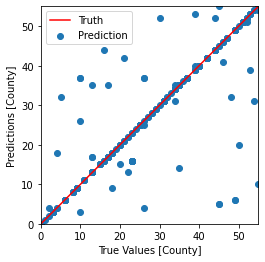

In [33]:
import matplotlib.pyplot as plt
truth_plot(truth, predic, savepath='')

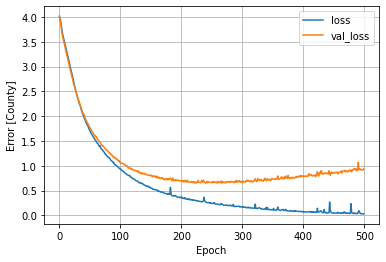

In [34]:
plot_loss(history)

In [35]:
model.save('/Users/Rachel/Desktop/class/Projects/model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /Users/Rachel/Desktop/class/Projects/model\assets


In [36]:
confusion_matrix(truth, predic)

array([[9, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [37]:
f1_score(truth, predic, average='weighted')

0.8303592869162337

In [38]:
climate.describe()

,AcresBurned,Month,Year,Rainfall,MinTemp,MaxTemp,AvgTemp
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,4763.813874,7.405907,2016.771978,25.943736,47.380907,72.249038,59.813187
std,28624.148976,1.755719,1.812954,18.082886,5.483292,5.648714,5.484941
min,0.000000,1.000000,2013.000000,3.120000,30.000000,57.000000,43.600000
25%,35.000000,6.000000,2016.000000,12.220000,44.500000,69.300000,56.700000
50%,100.000000,7.000000,2017.000000,21.100000,47.700000,72.400000,60.000000
75%,426.750000,9.000000,2018.000000,34.510000,50.200000,75.800000,63.225000
max,410203.000000,12.000000,2019.000000,97.590000,58.100000,83.900000,70.800000


## Predict county with next fire

AcresBurned, Latitude, Longitude, Month, Year,Location, Rainfall, MinTemp, MaxTemp, AvgTemp

In [39]:
guess = np.array((5000, 10, 2021, 26, 47, 72, 60))
guess = guess.reshape(1,-1)
scaled_guess = scaler.transform(guess)
prediction = model.predict(scaled_guess)
prediction = prediction.argmax(axis=1)
prediction_labels = get_names(prediction)
print(prediction_labels)

['Solano']
